<div align='center'>

# Machine Learning: Clustering

</div>

### What is Clustering?
Clustering is a general problem that we need to divide the whole dataset into several small groups (clusters) so that the points within each group are quite similar in certain ways. There are lots of daily examples around us:

1. Market Segmentation: Divide a broad business market into small segments so within each segments the most profitable characteristic could be discovered. After knowing this, they could select some of segments to become target markets.

2. Recommendation System: The system could collect your search history and then recommend similar products/videos/articles to you on the main page.

3. Image Segmentation: This is the process when dividing the whole all pixels into different non-overlapping sub groups and the union of them is the whole image.

Although it sounds very similar to the classification (perhaps due to the grouping operation), the main difference is that:

***Classification problem is to assign points into a given number of predefined categories but the clustering is to identify the similarities between points and group based on them (no given number, no predifined categories).***


By studying the clustering algorithm, we will also understand more about the unsupervised learning, a specific type of algorithm in the machine learining.

### What is Unsupervised Learning?
Unlike supervised learning algorithms where each data point has "features" and "labels" and could be mapped, unsupervised learning algorithm always handle unlabel data.

This means that supervised learning algorithms often try to use "features" to get a very clear "answer" but unsupervised learning algorithms tend to discover the deeply hidden patterns within the dataset, like the probability distribution, density estimation and so on.

However, this doesn't necessarily mean that the supervised learning algorithms could always produce better results with higher accuracy, ***it is more about the real situation (what kind of data you could obtain, what kind of problem you want to sovle)***.

Talking about the unsupervised learning, here we must introduce a very famous clustering algorithm here: K-Means Algorithm. Although it was firstly proposed in 1957, it is still very powerful and very efficient in lots of situations.

### K-Means Algorithm: Introduction
Unlike traditional machine learning algorithm with classical pipeline, the K-Means algorithm is more like a iterative algorithm, which keeps repeating certain steps until the end condition is met.

A classical K-Means algorithm contains the following steps:

1. Choose K.

2. Randomly initialise the starting representative point for each cluster.

3. Assign each data point to the corresponding cluster depending on the distance.

4. For every cluster, update the new representative point.

5. Repeat step 3 and 4 until the end condition is met.

No worry if you can't understand all of these for now, we will implement the whole algorithm step by step after we finish the preparation!

### Preparation: Loss Function (Dissimilarity)
As we mentioned before, the core idea of clustering is to group some points that are similar in some ways. This raises the question: how could we tell whether 2 points are similar or not?

In machine learning, the ***object*** in real life are represented by a ***high-dimentional point*** in the feature space, in which each dimention represents a distinct feature of the object.

For example, if we want to represent a ***car*** in machine learning problem, we could first choose **features** we are interested and construct the ***point*** using those **features**. If we are interested in **the number of wheels** and **the number of passengers**, we could construct a ***point*** like ***(the number of wheels, the number of passengers)***. So in this way, a normal ***car*** could be represented as ***(4,4)*** as it has 4 wheels and usually could take 4 passengers.

If the distance between 2 points is very small, we could say those points are very similar as their features are close to each other.

There are many ways to measure the distance, but all of them obey the following important rules:

1. The result is non-negative.

2. The distance is symmetric: $Distance(A,B) = Distance (B,A)$

3. Triangular Inequality: $Distance(A,C) \leqslant Distance(A,B)+Distance(B,C)$ for any possible A, B, C

There are lots of distance measurement, but we commonly use Manhattan distance (L1 norm), Euclidean distance (L2 norm), chessboard distance and so on. Within this tutorial, we will use Euclidean distance and it is always a good choice to try first.

#### Euclidean Distance
Within 2-D feature space, the euclidean distance between $(x_1, x_2)$ and $(y_1, y_2)$ is: $d=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2}$

In [54]:
def euclidean2D(pointX, pointY):
    '''
        Return the euclidean distance between the point X and the point Y
    in 2-D feature space
    
    Argument:
        pointX: tuple, a point with 2 features
        pointY: tuple, a point with 2 features
    
    Return:
        result: float, the euclidean distance between 2 points
    '''
    return ((pointX[0]-pointY[0])**2+(pointX[1]-pointY[1])**2)**0.5

pointX=(1, 2)
pointY=(3, 4)
print(f"The euclidean distance between 2 points is: {euclidean2D(pointX, pointY)}")

The euclidean distance between 2 points is: 2.8284271247461903


This idea could be easily expanded to N-D feature space and the distance between $(x_1...x_N)$ and $(y_1...y_N)$ is: $d=\sqrt{\sum_{i=1}^N (x_i-y_i)^2}$

In [55]:
def euclideanND(pointX, pointY):
    '''
        Return the euclidean distance between the point X and the point Y
    in N-D feature space

    Argument:
        pointX: tuple, a point with N features
        pointY: tuple, a point with N features
    
    Return:
        result: float, the euclidean distance between 2 points
    '''
    #Find all square of difference as a list
    squareDifference=[(pointX[i]-pointY[i])**2 for i in range(len(pointX))]
    #Sum all square of difference and return the square root of the result
    return sum(squareDifference)**0.5


pointX=(1, 2, 3, 4, 5)
pointY=(6, 7, 8, 9, 10)
print(f"The euclidean distance between 2 points is: {euclideanND(pointX, pointY)}")

# This could also be calculated by using numpy to find the norm 2 of the difference array
# The function used is: np.linalg.norm(inputArray, order of the norm)
# For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
import numpy as np
print(f"The euclidean distance between 2 points by numpy is: {np.linalg.norm(np.array(pointX)-np.array(pointY), ord=2)}")

The euclidean distance between 2 points is: 11.180339887498949
The euclidean distance between 2 points by numpy is: 11.180339887498949


### K-Means Algorithm from Scratch
#### 1. Choose K (how many clusters in total do we want?)
It is always a good idea to start from understanding the data. The biggest reason why the machine learning and even deep learning could have such a fantastic performance nowadays is that ***we could access to lots of data easily!***

The easiest way we could understand the data is by data visualisation. Here our "toy" dataset could be found in the **Dataset** folder and we could write some codes to read those data and plot it.

The total number of points in the dataset is 90 and each point has 2 features.


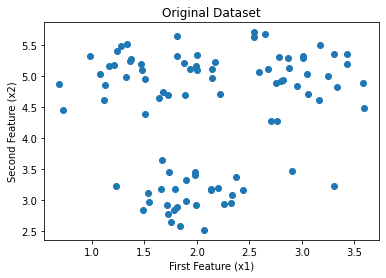

The first point in the dataset is [1.54364004 2.97058974].
The first feature of the first point is 1.5436400415855356.
The second feature of the first point is 2.9705897391425653.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

def readCSV(path="../Dataset/dataset.csv"):
    '''
        Read the csv file containing the dataset using the given path
    and return it as a numpy array

    Arugument:
        path: string, the file path to find the csv file
    
    Return:
        dataset: np.ndarray, numpy array with shape (the number of point, the number of features for each point)
    '''
    dataFrame=pd.read_csv(path)
    # Shuffle the dataset :)
    dataFrame.sample(frac=1)
    return dataFrame.values

dataset=readCSV()
print(f"The total number of points in the dataset is {dataset.shape[0]} and each point has {dataset.shape[1]} features.")

# Plot all points on a scatter plot
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.title("Original Dataset")
plt.xlabel("First Feature (x1)")
plt.ylabel("Second Feature (x2)")
plt.show()

# Each point within the dataset could be accessed by using the corresponding index
print(f"The first point in the dataset is {dataset[0]}")

# The feature of each point could also be accessed by index
print(f"The first feature of the first point is {dataset[0][0]}")
print(f"The second feature of the first point is {dataset[0][1]}")

It could be seen from the plot that the whole dataset could be roughly divided into 3 clusters. So in this case we choose K=3.

There is no strict rule for choosing K at this moment. But we do have some methods to optimize our choice in the later steps.

#### 2. Initialize a representative point for each cluster
Just like chooing K, there is no strict rule at this stage. Personally, I prefer to choose K random points from the dataset to start with.

In [57]:
import random

def randomChoose(dataset, K=3):
    '''
        Randomly choose K points from the dataset
    and return them as a numpy array

    Argument:
        dataset: np.ndarray, numpy array with shape (the number of point, the number of features for each point)
    
    Return:
        representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point)
    '''
    # random.sample() function could randomly choose k elements from the given sequence and return them as a list
    # For more information, please check: https://docs.python.org/3/library/random.html
    
    # Randomly choose K different indexes from available choices
    indexList=[i for i in range(len(dataset))]
    indexChosen=random.sample(indexList, K)

    # Choose corresponding points using those indexes
    representativePoint=[dataset[index] for index in indexChosen]
    return np.array(representativePoint)

representativePoint=randomChoose(dataset)
print(f"Is the first representative point in the dataset? {representativePoint[0] in dataset[:]}")
print(f"Is the second representative point in the dataset? {representativePoint[1] in dataset[:]}")
print(f"Is the third representative point in the dataset? {representativePoint[2] in dataset[:]}")

Is the first representative point in the dataset? True.
Is the second representative point in the dataset? True.
Is the third representative point in the dataset? True.


#### 3. Assign each point to the corresponding cluster depending on the distance
To correctly assign the point to the cluster, we compare the distance between the point and every representative point. After that we choose the one with the minimum distance.

In [61]:
def assignPoint(point, representativePoint):
    '''
        Return the index of the cluster where the given point
    should be assigned to by finding the index of representative
    point with the minimum distance
    
    Argument:
        point: np.ndarray, numpy array with shape (1, the number of features for each point)
        representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point)
    
    Return:
        cluster: int, the index of the cluster where the point should be assigned to
    '''
    # Find the distance between the given point and every representative point
    distance=[euclideanND(point, representativePoint[i]) for i in range(representativePoint.shape[0])]
    # Return the index of the representative point with the minimum distance
    return np.argmin(distance)

def assignDataset(dataset, representativePoint):
    '''
        Return a numpy array containing all cluster index for every point
    in the dataset
    
    Argument:
        dataset: np.ndarray, numpy array with shape (the number of point, the number of features for each point)
        representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point)
    
    Return:
        cluster: np.ndarray, numpy array with shape (the number of point, 1)   
    '''
    # Find the corresponding cluster for every point in the dataset
    cluster=[assignPoint(dataset[i], representativePoint) for i in range(dataset.shape[0])]
    return np.array(cluster)

cluster=assignDataset(dataset, representativePoint)
print(f"The first point is assigned to the cluster {cluster[0]}")

The first point is assigned to the cluster 0


#### Update the representative point for each cluster
The name "K-Means" comes from the fact that we use the mean point (equivalent to the centroid) of each cluster as the representative point.

The centroid of a cluster could be found by: $\frac{1}{|C_i|}\sum_{x\in{C_i}} x$

$C_i$ means an arbitrary cluster of points.

$x\in{C_i}$ means x is a point within teh cluster $C_i$.

$|C_i|$ means the number of points in the cluster $C_i$.